In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_formir import *
from random import uniform
import random

In [4]:
def SR3B (ranges, xinti,yinti,zinti, origin): #given range, one point, origin, if it lies in or not
    xr = ranges[0]
    yr = ranges[1]
    zr = ranges[2]
    xc = origin[0]
    yc = origin[1]
    zc = origin[2]
    if ( ((((xinti-xc)**2)/xr**2) + (((yinti-yc)**2)/yr**2) + (((zinti-zc)**2)/zr**2))) <= 1:
        return True
    else:
        return False
#plane line interesection
def PLINT(z,p,v):
    t = (z - p[2])/v[2]
    x = p[0] + t*v[0]
    y = p[1] + t*v[1]
    return x,y,z

In [5]:
x2,y2,z2 = [],[],[]
ranges = [41.577020202020208, 32.523395696802737, 19.579712527288851] #ranges 10
origin = [0,0,0]
for i in range (0,100000):
    x = random.random()
    y = random.random()
    z = random.random()
    x = x -.5
    y = y - .5
    z = z-.5
    xi = x*100
    yi = y*100
    zi = z*100
    if SR3B(ranges,xi,yi,zi,origin) == True:
        x2.append(xi)
        y2.append(yi)
        z2.append(zi)
        
        

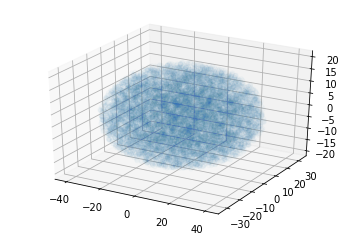

In [6]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.scatter(x2,y2,z2, alpha = .02)
pl.show()

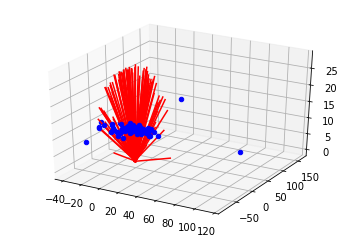

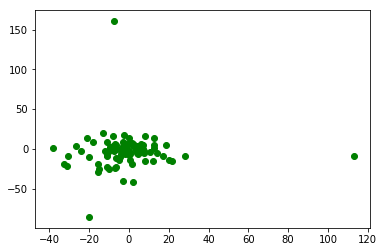

In [7]:
sourcepointorigin = [0,0,0] #LOCAL 
sourcethet = [0,0,0] #SHOT STRAIGHT UP
sourcepoints = specsource(1,sourcepointorigin,sourcethet) #LOCAL
sourcep1, sv1 = FS(100,sourcepoints, sourcethet,origin) #LOCAL
spx,spy,spz = sep(sourcep1)
svx,svy,svz = sep(sv1)

def PLINT2(z,p,v):
    point = []
    for i in range (0,len(p)):
        t = (z - p[i][2])/v[i][2]
        xi = p[i][0] + t*v[i][0]
        yi = p[i][1] + t*v[i][1]
        point.append([xi,yi,z])
    return point
point = PLINT2(10,sourcep1,sv1)
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(sourcep1)):
    x,y,z = ML(sourcep1[i],sv1[i],40)
    pl3dsurf.plot(x,y,z, color = 'red')
    pl3dsurf.scatter(point[i][0],point[i][1],point[i][2], color = 'blue')
    #print(z2)
pl.show()

for i in range (0,len(sourcep1)):
    pl.scatter(point[i][0],point[i][1], color = 'green')
pl.show()



def PLINT2(z,p,v):
    xf,yf,zf = [],[],[]
    for i in range (0,len(p)):
        t = (z - p[2])/v[2]
        xi = p[0] + t*v[0]
        yi = p[1] + t*v[1]
        xf.append(xi)
        yf.append(yi)
        zf.append(z)
    return xf,yf,zf
x2,y2,z2 = PLINT2(10,sourcep1,sv1)
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(sourcep1)):
    x,y,z = ML(sourcep1[i],sv1[i],40)
    pl3dsurf.plot(x,y,z, color = 'red')
    pl3dsurf.plot(x2,y2,z2, color = 'blue')
pl.show()



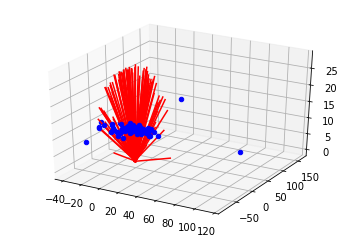

In [12]:
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spx)):
    x,y,z = PLINT (10,[spx[i],spy[i],spz[i]],[svx[i],svy[i],svz[i]])
    pl3dsurf.scatter(x,y,z, color = 'blue')
    x,y,z = ML([spx[i],spy[i],spz[i]], [svx[i],svy[i],svz[i]], 40) #global
    pl3dsurf.plot(x,y,z, color = 'red')
pl.show()

In [2]:
coeffellipse56 = [256.65,248.39,64.58]  #for ellipses 5&6
origin5 = [128.3,-120.501,0] # (ellipse5)
origin6 = [128.3,120.501,0] # (ellipse6)
thet5 = [0,0,-.1164] 
thet6 = [0,0,.1164] #testing
#ELLIPSE 5&6
X5,Y5,Z5,X6,Y6,Z6 = FTSEC(50,np.pi/4, coeffellipse56, 350, 'pos') #LOCAL
X5n,Y5n,Z5n,X6n,Y6n,Z6n = FTSEC(50,np.pi/4, coeffellipse56, 350, 'neg') #LOCAL
#ELLIPSE 5
#Xset5, Yset5, Zset5= transformLG(X5,Y5,Z5,origin5,thet5) #GLOBAL
#Xset6, Yset6, Zset6 = transformLG(X6,Y6,Z6,origin5,thet5) #GLOBAL
#X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5) #SELECTED GLOBAL
#X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5) #SELECTED GLOBAL
#center5,range5 = xrangeGL6(X5,Y5,Z5,X6,Y6,Z6,origin5,thet5)
#ELLIPSE 6
Xset5n,Yset5n,Zset5n = transformLG(X5n,Y5n,Z5n,origin6,thet6) #GLOBAL
Xset6n,Yset6n,Zset6n = transformLG(X6n,Y6n,Z6n,origin6,thet6) #GLOBAL
X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6) #SELECTED GLOBAL
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6) #SELECTED GLOBAL
center6,range6 = xrangeGL6(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)

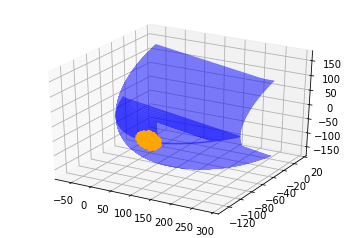

In [3]:
#global
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(Xset6n,Yset6n,Zset6n, alpha = .5, color = 'blue')
pl3dsurf.plot(Xset5n,Yset5n,Zset5n, alpha = .5, color = 'blue')
pl3dsurf.plot(X5n,Y5n,Z5n, color = 'orange')
pl3dsurf.plot(X6n,Y6n,Z6n, color = 'orange')
pl.show()

#WHY is it only on half??

#local
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(X5n,Y5n,Z5n, alpha = .5, color = 'blue')
pl3dsurf.plot(X6n,Y6n,Z6n, alpha = .5, color = 'blue')
#pl3dsurf.plot(X5n,Y5n,Z5n, color = 'orange')
#pl3dsurf.plot(X6n,Y6n,Z6n, color = 'orange')
pl.show()